In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [2]:
path='/shared/obs/gridded/GHCN_CAMS/'
file='air.mon.mean.nc'

In [3]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 867)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-03-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

In [4]:
ds=ds.reindex(lat=list(reversed(ds['lat'])))

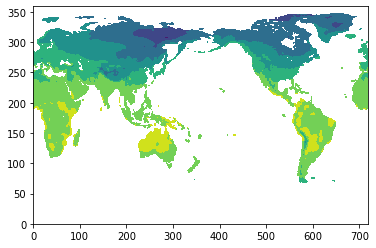

In [5]:
plt.contourf(ds['air'][0,:,:])

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Washington DC Temperature (K)')

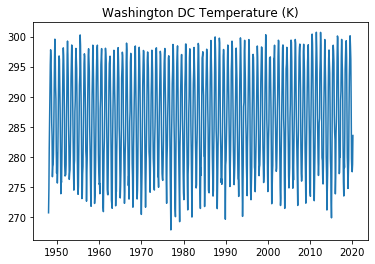

In [6]:
ds_pt=ds.sel(lat=39,lon=360-77,method='nearest')
plt.plot(ds_pt['time'],ds_pt['air'])
plt.title('Washington DC Temperature (K)')

In [7]:
ds_climo=ds.groupby('time.month').mean()
ds_climo

/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, month: 12)
Coordinates:
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

Text(0.5, 1.0, 'Washington DC Temperature K')

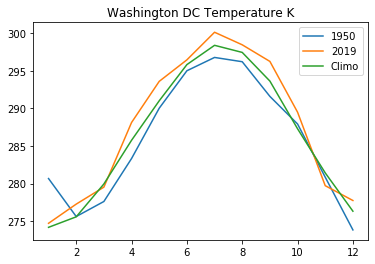

In [10]:
ds_ptclimo=ds_climo.sel(lat=39,lon=360-77,method='nearest')
ds_pt1950=ds_pt.sel(time=slice('1950-01-01','1950-12-01'))
ds_pt2019=ds_pt.sel(time=slice('2019-01-01','2019-12-01'))

x_lab=np.arange(1,13,1)
#mon_lab=['J','F','M']
plt.plot(x_lab,ds_pt1950['air'])
plt.plot(x_lab,ds_pt2019['air'])
plt.plot(x_lab,ds_ptclimo['air'])
plt.legend(['1950','2019','Climo'])
plt.title('Washington DC Temperature K')

In [11]:
ds_anoms=ds.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 867)
Coordinates:
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-03-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 5 6 7 8 9 10 11 12 1 2 3
Data variables:
    air      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

Text(0.5, 1.0, 'Washington DC Temperature Anomalies')

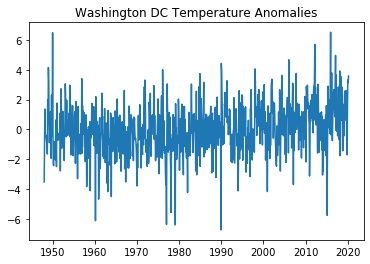

In [12]:
ds_anomspt=ds_anoms.sel(lat=39,lon=360-77,method='nearest')
plt.plot(ds_anoms['time'],ds_anomspt['air'])
plt.title('Washington DC Temperature Anomalies')

Text(0.5, 1.0, 'NOAA/NCEP GHCN CAMS Monthly Temperature')

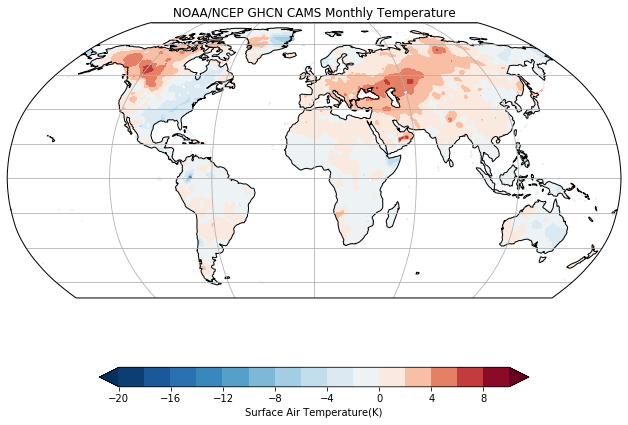

In [14]:
import matplotlib.colors as colors

clevs=np.arange(-20,11,2)
fig=plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())

divnorm=colors.DivergingNorm(vcenter=0)

cs=ax.contourf(ds_anoms['lon'],ds_anoms['lat'],
              ds_anoms['air'][0,:,:],clevs,
              transform=ccrs.PlateCarree(),
              cmap='RdBu_r',extend='both',
              norm=divnorm)

ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs,shrink=0.7,orientation='horizontal',
                 label='Surface Air Temperature(K)')
plt.title(ds.attrs['title'])

In [ ]:
path_daily='/shared/obs/gridded/CPC-PRECIP-CONUS/daily/'
files_daily='precip.V1.0.*.nc'

In [ ]:
ds_daily=xr.open_mfdataset(path_daily+files_da)